In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical



In [39]:
# STEP 1: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [40]:
# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0



In [41]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [42]:
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes (0–9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)


Epoch 1/10
422/422 - 38s - 90ms/step - accuracy: 0.8983 - loss: 0.3301 - val_accuracy: 0.9843 - val_loss: 0.0589
Epoch 2/10
422/422 - 42s - 99ms/step - accuracy: 0.9685 - loss: 0.1063 - val_accuracy: 0.9880 - val_loss: 0.0437
Epoch 3/10
422/422 - 40s - 96ms/step - accuracy: 0.9757 - loss: 0.0809 - val_accuracy: 0.9883 - val_loss: 0.0391
Epoch 4/10
422/422 - 41s - 97ms/step - accuracy: 0.9802 - loss: 0.0669 - val_accuracy: 0.9920 - val_loss: 0.0326
Epoch 5/10
422/422 - 36s - 85ms/step - accuracy: 0.9831 - loss: 0.0562 - val_accuracy: 0.9905 - val_loss: 0.0323
Epoch 6/10
422/422 - 36s - 86ms/step - accuracy: 0.9848 - loss: 0.0500 - val_accuracy: 0.9898 - val_loss: 0.0324
Epoch 7/10
422/422 - 41s - 97ms/step - accuracy: 0.9867 - loss: 0.0438 - val_accuracy: 0.9908 - val_loss: 0.0305
Epoch 8/10
422/422 - 41s - 97ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9918 - val_loss: 0.0300
Epoch 9/10
422/422 - 40s - 95ms/step - accuracy: 0.9882 - loss: 0.0378 - val_accuracy: 0.9910 - 

313/313 - 3s - 9ms/step - accuracy: 0.9938 - loss: 0.0216

Test Accuracy: 99.38%


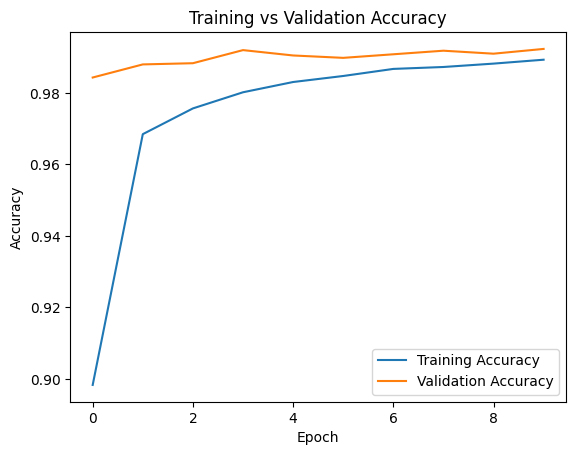

In [45]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


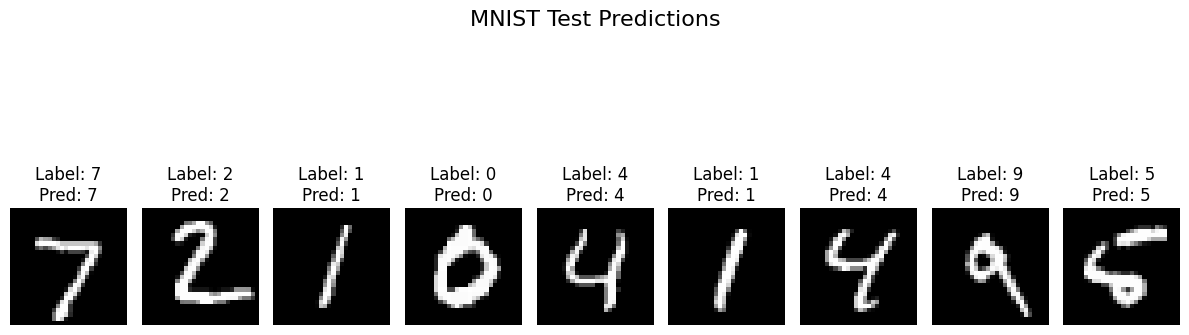

In [50]:
# Predict on test set
predictions = model.predict(x_test)

# Show 5 test images with predictions
plt.figure(figsize=(12, 5))
for i in range(9):
    plt.subplot(1, 9, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_test[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis("off")
plt.suptitle("MNIST Test Predictions", fontsize=16)
plt.tight_layout()
plt.show()


In [47]:
model.save("digit_model.h5")

In [48]:
from google.colab import files
files.download("digit_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>